In [2]:
# Import required packages
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



%matplotlib inline

In [3]:
# import UniversalBank.csv
ub_df = pd.read_csv('UniversalBank.csv')
ub_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


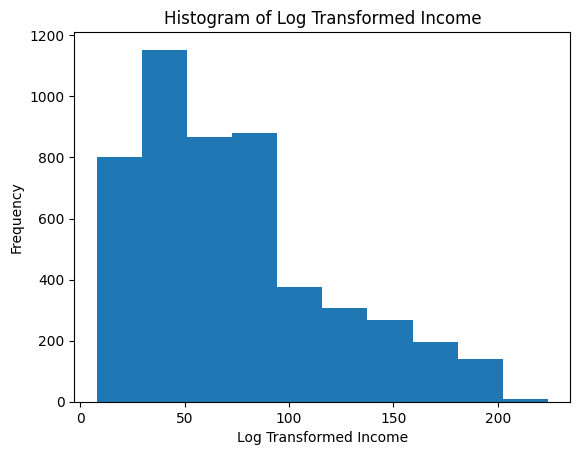

In [5]:
# Create the histogram
plt.hist(ub_df['Income'], bins=10)  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('Log Transformed Income')
plt.ylabel('Frequency')
plt.title('Histogram of Log Transformed Income')

# Display the histogram
plt.show()

In [6]:
# Log transform income
ub_df['Income'] = np.log(ub_df['Income'])

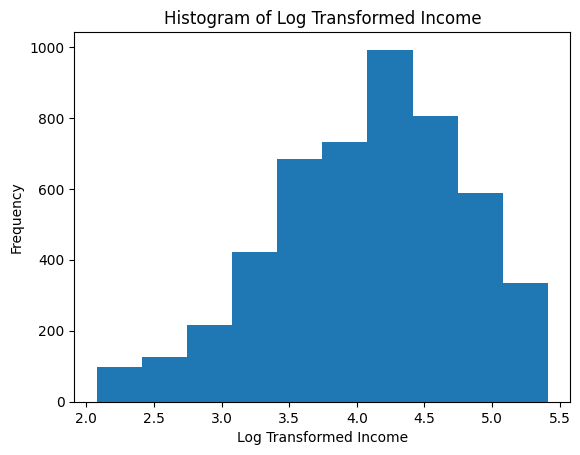

In [7]:
# Create the histogram
plt.hist(ub_df['Income'], bins=10)  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('Log Transformed Income')
plt.ylabel('Frequency')
plt.title('Histogram of Log Transformed Income')

# Display the histogram
plt.show()

In [8]:
ub_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,4.085451,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,0.696455,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,2.079442,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,3.663562,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,4.158883,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,4.584967,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,5.411646,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
# One-hot encode the 'Education' column
ub_df = pd.get_dummies(ub_df, columns=['Education'], prefix='Education')
ub_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1,3.891820,91107,4,1.6,0,0,1,0,0,0,True,False,False
1,2,45,19,3.526361,90089,3,1.5,0,0,1,0,0,0,True,False,False
2,3,39,15,2.397895,94720,1,1.0,0,0,0,0,0,0,True,False,False
3,4,35,9,4.605170,94112,1,2.7,0,0,0,0,0,0,False,True,False
4,5,35,8,3.806662,91330,4,1.0,0,0,0,0,0,1,False,True,False


1. Partition the data into training (75%) and validation (25%) sets.

In [10]:
#data split
trainData, validData = train_test_split(ub_df, test_size=0.25, random_state=123)
print(trainData.shape, validData.shape)

(3750, 16) (1250, 16)


2. Consider the following customer for classification: Age = 40, Experience = 10,
Income = 84, Family = 2, CCAvg = 2, Education_1 = 0, Education_2 = 1,
Education_3 = 0, Mortgage = 0, Securities Account = 1, CD Account = 1, Online = 1,
and Credit Card = 1.

In [11]:
# Creating a new customer
new_customer = pd.DataFrame({
    'Age': [40],
    'Experience': [10],
    'Income': [84],
    'Family': [2],
    'CCAvg': [2],
    'Education_1': [0],
    'Education_2': [1],
    'Education_3': [0],
    'Mortgage': [0],
    'Securities Account': [1],
    'CD Account': [1],
    'Online': [1],
    'CreditCard': [1]
})
new_customer.head()

,Age,Experience,Income,Family,CCAvg,Education_1,Education_2,Education_3,Mortgage,Securities Account,CD Account,Online,CreditCard
0,40,10,84,2,2,0,1,0,0,1,1,1,1


3. Standardize all the data sets using mean and standard deviations.

In [12]:
# Scaling the data
scaler = preprocessing.StandardScaler()

# Fit the scaler on the numeric columns of the training data
scaler.fit(trainData[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']])

# Transform the training, validation, and new customer data
UBNorm = pd.concat([pd.DataFrame(scaler.transform(ub_df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']]),
                                    columns=['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zMortgage']),
                       ub_df[['Education_1', 'Education_2', 'Education_3', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']]], axis=1)

trainNorm = UBNorm.iloc[trainData.index]
validNorm = UBNorm.iloc[validData.index]
# Select only the columns used for fitting the scaler from the new customer data
new_customer_subset = new_customer[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']]

# Transform the new customer data subset
new_customerNorm = pd.DataFrame(scaler.transform(new_customer_subset),
                                 columns=['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zMortgage'],
                                 index=new_customer.index)
new_customerNorm = pd.concat([new_customerNorm, new_customer[['Education_1', 'Education_2', 'Education_3', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]], axis=1)

In [13]:
new_customerNorm.head()

,zAge,zExperience,zIncome,zFamily,zCCAvg,zMortgage,Education_1,Education_2,Education_3,Securities Account,CD Account,Online,CreditCard
0,-0.467018,-0.885641,115.924992,-0.33917,0.031062,-0.554029,0,1,0,1,1,1,1


4. Perform a k-NN classification with all predictors except ID and ZIP code using k = 1.
How would this customer be classified?

In [14]:
knn = NearestNeighbors(n_neighbors=1)
# Use all predictors except ID and ZIP code
predictors = ['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zMortgage', 'Education_1', 'Education_2', 'Education_3', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
# Pass the DataFrame with selected columns to fit() using a list of column names
knn.fit(trainNorm[predictors])
distances, indices = knn.kneighbors(new_customerNorm[predictors])
print(trainNorm.iloc[indices[0], :])



          zAge  zExperience   zIncome  zFamily    zCCAvg  zMortgage  \
3896  0.237029     0.346339  1.917658 -0.33917  2.692492  -0.554029   

      Education_1  Education_2  Education_3  Securities Account  CD Account  \
3896         True        False        False                   0           1   

      Online  CreditCard  Personal Loan  
3896       1           1              0  


Since the nearest neighbor's Personal Loan value is 0, this means the new customer would also be classified as 0 for the Personal Loan variable. This indicates that, based on the similarity to the nearest customer in the dataset, the new customer would not accept the loan offer (class 0).

5. Now find the optimal value of k using the validation data set. What is the optimal k?

In [15]:
train_X = trainNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zMortgage', 'Education_1', 'Education_2', 'Education_3', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
train_y = trainNorm['Personal Loan']
valid_X = validNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zMortgage', 'Education_1', 'Education_2', 'Education_3', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
valid_y = validNorm['Personal Loan']

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X.values, train_y.values)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y.values, knn.predict(valid_X.values))
    })

results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1    0.9536
1    2    0.9464
2    3    0.9584
3    4    0.9512
4    5    0.9544
5    6    0.9472
6    7    0.9528
7    8    0.9432
8    9    0.9472
9   10    0.9400
10  11    0.9432
11  12    0.9384
12  13    0.9416
13  14    0.9400


The optimal k values is 3 with an accuracy of 0.9584.

6. Print the confusion matrix for the validation data that results from using the optimal
k.

In [16]:
knn_optimal = KNeighborsClassifier(n_neighbors=3)
knn_optimal.fit(train_X, train_y)
y_pred = knn_optimal.predict(valid_X)
confusion = confusion_matrix(valid_y, y_pred)

print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[1119    6]
 [  46   79]]


7. Classify the customer specified in Question 2 using the best k.

In [17]:
# Predict the class label for the new customer using the optimal k=3
new_customer_pred = knn_optimal.predict(new_customerNorm[predictors])

print(f"Predicted class label for the new customer: {new_customer_pred[0]}")

Predicted class label for the new customer: 0


The customer is predicted to not taking a loan

8. Now repartition the data into three parts: training, validation, and test sets (50%,
30%, and 20%).

In [18]:
# Split the data into training, validation, and test sets
train_data, temp_data = train_test_split(ub_df, test_size=0.5, random_state=123)
valid_data, test_data = train_test_split(temp_data, test_size=0.4, random_state=123)

print(train_data.shape, valid_data.shape, test_data.shape)

(2500, 16) (1500, 16) (1000, 16)


In [19]:
# Scaling data
scaler = preprocessing.StandardScaler()
scaler.fit(train_data[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']])

train_data_scaled = pd.DataFrame(scaler.transform(train_data[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']]),
                                columns=['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zMortgage'], index=train_data.index)
train_data_scaled = pd.concat([train_data_scaled, train_data.drop(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'], axis=1)], axis=1)


# Standardize the validation data
valid_data_scaled = pd.DataFrame(scaler.transform(valid_data[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']]),
                                columns=['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zMortgage'], index=valid_data.index)
valid_data_scaled = pd.concat([valid_data_scaled, valid_data.drop(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'], axis=1)], axis=1)

# Standardize the test data
test_data_scaled = pd.DataFrame(scaler.transform(test_data[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']]),
                               columns=['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zMortgage'], index=test_data.index)
test_data_scaled = pd.concat([test_data_scaled, test_data.drop(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'], axis=1)], axis=1)

print(train_data_scaled.head())

          zAge  zExperience   zIncome   zFamily    zCCAvg  zMortgage    ID  \
3342 -0.626417    -0.602177  0.484436  0.528255 -0.423792   0.595729  3343   
1175 -1.420110    -1.395675 -0.052564 -1.217466 -0.652824  -0.552122  1176   
850   0.079087     0.014988 -0.627996 -1.217466 -0.996372  -0.552122   851   
3660 -0.626417    -0.690343 -0.027779 -0.344605  0.263304  -0.552122  3661   
4120  0.343651     0.279488 -1.393633 -1.217466 -0.309276  -0.552122  4121   

      ZIP Code  Personal Loan  Securities Account  CD Account  Online  \
3342     91330              0                   0           0       1   
1175     91006              0                   0           0       1   
850      95054              0                   0           0       0   
3660     93401              0                   0           0       0   
4120     94080              0                   0           0       0   

      CreditCard  Education_1  Education_2  Education_3  
3342           1        False     

In [20]:
# Remove ID and Zip Code
train_data_scaled = train_data_scaled.drop(columns=['ID', 'ZIP Code'])
valid_data_scaled = valid_data_scaled.drop(columns=['ID', 'ZIP Code'])
test_data_scaled = test_data_scaled.drop(columns=['ID', 'ZIP Code'])

# Partition into X and y
train_X = train_data_scaled.drop(columns=['Personal Loan'])
train_y = train_data_scaled['Personal Loan']
valid_X = valid_data_scaled.drop(columns=['Personal Loan'])
valid_y = valid_data_scaled['Personal Loan']
test_X = test_data_scaled.drop(columns=['Personal Loan'])
test_y = test_data_scaled['Personal Loan']


9. Apply the k-NN method with the optimal k chosen above.  

In [21]:
knn_optimal = KNeighborsClassifier(n_neighbors=3)
knn_optimal.fit(train_X, train_y)
y_pred = knn_optimal.predict(valid_X)

10. Compare the confusion matrix of the test set with that of the training and validation
sets. Comment on the differences and their reason.

In [ ]:
# Predict on the test set
test_y_pred = knn_optimal.predict(test_X)

# Create confusion matrices for training, validation, and test sets
train_conf_matrix = confusion_matrix(train_y, knn_optimal.predict(train_X))
valid_conf_matrix = confusion_matrix(valid_y, y_pred)
test_conf_matrix = confusion_matrix(test_y, test_y_pred)

print("Training Confusion Matrix:")
print(train_conf_matrix)

print("\nValidation Confusion Matrix:")
print(valid_conf_matrix)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

Training Confusion Matrix:
[[2256    2]
 [  72  170]]

Validation Confusion Matrix:
[[1347    6]
 [  55   92]]

Test Confusion Matrix:


array([[905,   4],
       [ 38,  53]])

In [23]:
# Classification report for the training set
print("Classification Report for Training Set:")
print(classification_report(train_y, knn_optimal.predict(train_X)))

# Classification report for the validation set
print("\nClassification Report for Validation Set:")
print(classification_report(valid_y, y_pred))

# Classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(test_y, test_y_pred))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2258
           1       0.99      0.70      0.82       242

    accuracy                           0.97      2500
   macro avg       0.98      0.85      0.90      2500
weighted avg       0.97      0.97      0.97      2500


Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1353
           1       0.94      0.63      0.75       147

    accuracy                           0.96      1500
   macro avg       0.95      0.81      0.86      1500
weighted avg       0.96      0.96      0.96      1500


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       909
           1       0.93      0.58      0.72        91

    accuracy                           0.96      1000
   macro

The three confusion matrices above shows the model is competant.
 the false positive and false negative rates for training data are slighty better compared to the test and validation rates. This shows that model performs similary on all 3 data partitions. So, the model is not overfit. The slightly better performance in the training set can be attributed to the model being trained on it.         